In [56]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd

In [57]:
data = pd.read_csv ('inputs\Billionaire.csv')
data.head (5)

,Name,NetWorth,Country,Source,Rank,Age,Industry
0,Jeff Bezos,$177 B,United States,Amazon,1,57.0,Technology
1,Elon Musk,$151 B,United States,"Tesla, SpaceX",2,49.0,Automotive
2,Bernard Arnault & family,$150 B,France,LVMH,3,72.0,Fashion & Retail
3,Bill Gates,$124 B,United States,Microsoft,4,65.0,Technology
4,Mark Zuckerberg,$97 B,United States,Facebook,5,36.0,Technology


Pre-Processing

In [58]:
data = data.dropna().reset_index()

data.isnull().sum()

index       0
Name        0
NetWorth    0
Country     0
Source      0
Rank        0
Age         0
Industry    0
dtype: int64

In [59]:
data ['NetWorth'] = data ['NetWorth'].str.strip ('$')
data ['NetWorth'] = data ['NetWorth'].str.strip ('B')
data ['NetWorth'] = data ['NetWorth'].astype (float)

data.head (5)

,index,Name,NetWorth,Country,Source,Rank,Age,Industry
0,0,Jeff Bezos,177.0,United States,Amazon,1,57.0,Technology
1,1,Elon Musk,151.0,United States,"Tesla, SpaceX",2,49.0,Automotive
2,2,Bernard Arnault & family,150.0,France,LVMH,3,72.0,Fashion & Retail
3,3,Bill Gates,124.0,United States,Microsoft,4,65.0,Technology
4,4,Mark Zuckerberg,97.0,United States,Facebook,5,36.0,Technology


Age Mean and Variance

In [60]:
age = np.array (data ['Age'])

mean = np.mean (age)
print ('Mean of billionaires age = ' , mean)

var = np.var (age)
print ('Variance of billionaires age = ' , var)

Mean of billionaires age =  63.1136023916293
Variance of billionaires age =  180.70458328585374


Sum of each countries Worth

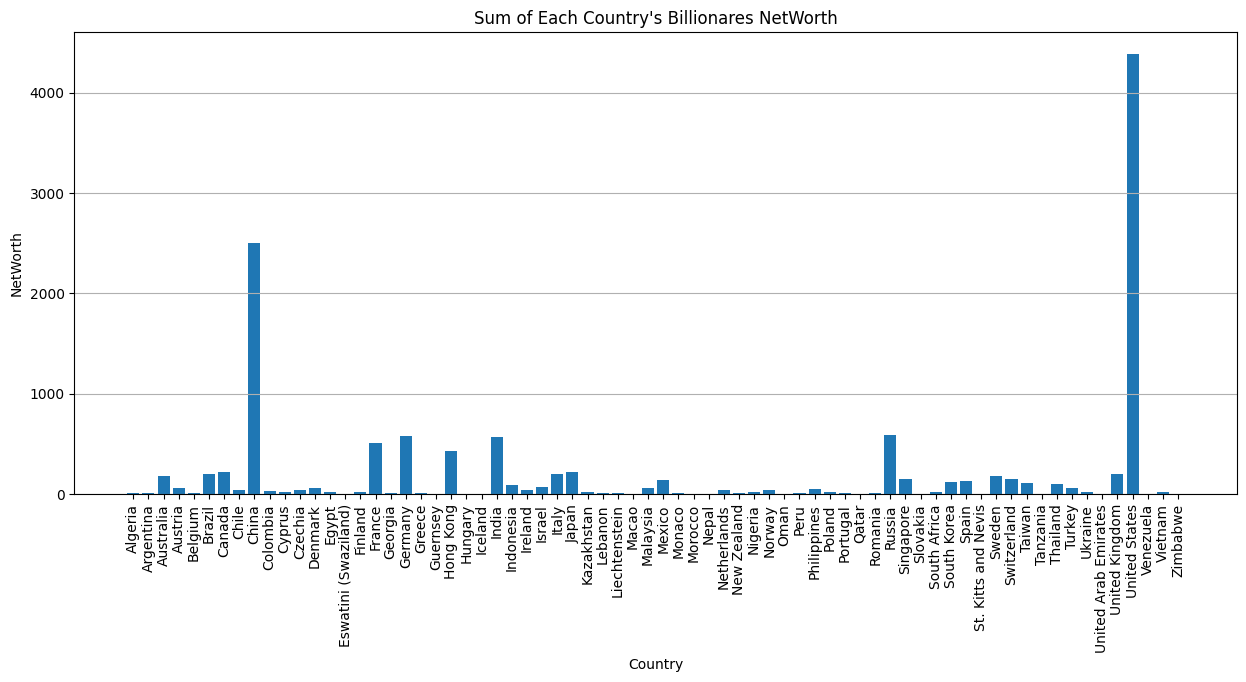

<Figure size 640x480 with 0 Axes>

In [73]:
df_country = data.groupby (['Country'])['NetWorth'].sum().reset_index ()
df_country

plt.figure (figsize = (15 , 6))
plt.bar (df_country['Country'] , df_country['NetWorth'])

plt.xticks (rotation = 'vertical')
plt.xlabel ('Country')
plt.ylabel ('NetWorth')
plt.title ("Sum of Each Country's Billionares NetWorth")

plt.grid (axis= 'y')
plt.show ()
plt.savefig ('outputs\output1 networth sum.jpg')
